In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'x' : [x for x in range(1, 101)],
'y' : [2*x for x in range(1, 101)]}
df = pd.DataFrame(data)
df

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
...,...,...
95,96,192
96,97,194
97,98,196
98,99,198


In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(df.x.to_numpy().reshape(-1, 1), df.y.to_numpy().reshape(-1, 1), test_size=0.2, random_state=42)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(test_input, test_target)) 

1.0


In [6]:
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(64, 1) (64, 1) (20, 1) (20, 1)


In [52]:
from tensorflow import keras
model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(1,)))
model.add(keras.layers.Dense(50, activation='linear', input_dim=1))
model.add(keras.layers.Dense(50, activation='linear', input_dim=1))
model.add(keras.layers.Dense(1, activation='linear', input_dim=1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                100       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [53]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('quiz_best_model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history= model.fit(train_input, train_target, epochs=300, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300


2023-09-07 11:11:48.059589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 133ms/step - loss: 9665.1738 - mae: 82.4277 - val_loss: 0.1886 - val_mae: 0.4331
Epoch 2/300
2/2 [==============================] - 0s 23ms/step - loss: 1168.3319 - mae: 21.4013 - val_loss: 4128.6709 - val_mae: 53.6201
Epoch 3/300
2/2 [==============================] - 0s 22ms/step - loss: 4154.8115 - mae: 57.1101 - val_loss: 1783.9917 - val_mae: 35.2402
Epoch 4/300
2/2 [==============================] - 0s 22ms/step - loss: 1116.4070 - mae: 28.4995 - val_loss: 1.2707 - val_mae: 0.9689
Epoch 5/300
1/2 [==============>...............] - ETA: 0s - loss: 1.3484 - mae: 1.0543

2023-09-07 11:11:48.325153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 23ms/step - loss: 142.0280 - mae: 7.9008 - val_loss: 783.4391 - val_mae: 23.2954
Epoch 6/300
2/2 [==============================] - 0s 22ms/step - loss: 1100.9666 - mae: 29.1817 - val_loss: 1384.8438 - val_mae: 30.9809
Epoch 7/300
2/2 [==============================] - 0s 21ms/step - loss: 1431.6755 - mae: 33.3780 - val_loss: 929.7483 - val_mae: 25.3837
Epoch 8/300
2/2 [==============================] - 0s 24ms/step - loss: 790.4351 - mae: 24.8216 - val_loss: 247.6944 - val_mae: 13.0975
Epoch 9/300
2/2 [==============================] - 0s 22ms/step - loss: 138.9170 - mae: 9.8971 - val_loss: 3.1218 - val_mae: 1.4798
Epoch 10/300
2/2 [==============================] - 0s 22ms/step - loss: 46.2869 - mae: 5.0261 - val_loss: 248.4864 - val_mae: 13.1347
Epoch 11/300
2/2 [==============================] - 0s 24ms/step - loss: 371.0804 - mae: 16.7699 - val_loss: 434.5734 - val_mae: 17.3649


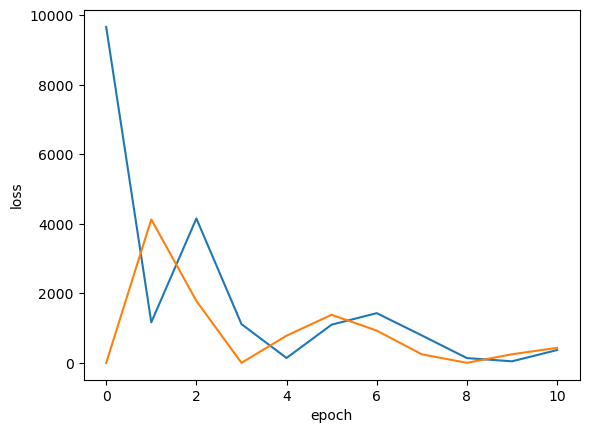

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [55]:
model.evaluate(val_input, val_target)

1/1 [==============================] - 0s 15ms/step - loss: 0.1886 - mae: 0.4331


[0.18864527344703674, 0.43309009075164795]

In [56]:
model.evaluate(test_input, test_target)

1/1 [==============================] - 0s 30ms/step - loss: 0.1865 - mae: 0.4308


[0.18647193908691406, 0.4308345913887024]

In [57]:
model.get_weights()

[array([[ 0.3525818 ,  0.31662545,  0.12653542, -0.29854512,  0.06571366,
          0.26202032, -0.23163919,  0.07865377,  0.32052407,  0.10247781,
          0.3164214 , -0.09764484, -0.04211077, -0.28599522,  0.22163846,
          0.33763513,  0.31288844,  0.02189083, -0.24203631, -0.02620702,
          0.12329032, -0.1596724 , -0.11518298,  0.20216307, -0.29586646,
          0.35050386,  0.03341442, -0.07624061,  0.04915296,  0.07866412,
         -0.09968819,  0.17839755,  0.15430775,  0.33075178,  0.24236555,
         -0.00956022, -0.01043168,  0.07620635, -0.13399905, -0.14961019,
          0.26453775, -0.31729385, -0.20092233,  0.32788014, -0.06640081,
          0.25151944,  0.00721398,  0.24995935,  0.3348799 ,  0.28103918]],
       dtype=float32),
 array([ 0.0196331 , -0.01668433,  0.02001367,  0.01637017, -0.0138389 ,
        -0.01865472,  0.01678819, -0.01862668,  0.01996147, -0.0178482 ,
         0.02001345,  0.01273145, -0.01926567,  0.01833325,  0.01977592,
        -0.00447

In [58]:
model.predict(np.array([[100]]))[0][0]

1/1 [==============================] - 0s 52ms/step


2023-09-07 11:11:50.352754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200.48709

In [13]:
# 필요한 라이브러리들 임포트
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 데이터 준비
data = {'x': [x for x in range(1, 101)],
        'y': [2*x for x in range(1, 101)]}
df = pd.DataFrame(data)
X = np.array(df['x']).reshape(-1, 1)
Y = np.array(df['y']).reshape(-1, 1)

# Keras Sequential 모델 구성
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# 모델 훈련
model.fit(X, Y, epochs=100, batch_size=10)

# 예측 수행
predictions = model.predict(X)

# 몇몇 예측 결과 출력
print(predictions[:5])


Epoch 1/100
 1/10 [==>...........................] - ETA: 1s - loss: 6171.8623

2023-09-07 10:49:10.481063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 3ms/step - loss: 6489.7017
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 5631.0684
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 4809.8564
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 4096.4189
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3468.9211
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2898.3799
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2411.0476
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1987.2306
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1626.3397
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1325.8158
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 1058.7111
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 855.2131
Epoch 13/100
1

2023-09-07 10:49:14.054690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
